### **1.1 About the dataset**

The dataset comprises 30 days of hourly transactions, categorized into types such as CASH-IN, CASH-OUT, DEBIT, PAYMENT, and TRANSFER, each with corresponding amounts in local currency. Transactions involve two parties, the initiator and recipient, with initial and new balances. The 'isFraud' label flags transactions by fraudulent agents attempting to take control of accounts and deplete funds. Additionally, the 'isFlaggedFraud' flag identifies attempts to transfer over 200,000 in a single transaction, as part of the model's effort to prevent large-scale illegal transfers. The dataset offers insights into financial interactions and facilitates the analysis of fraudulent activities in the simulated environment.

### **1.2 Variable Description**

- step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

- amount - amount of the transaction in local currency.

- nameOrig - customer who started the transaction

- oldbalanceOrg - initial balance before the transaction

- newbalanceOrig - new balance after the transaction

- nameDest - customer who is the recipient of the transaction

- oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

### **2.1 Loading the Dataset**

In [ ]:
# Importing the required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve, roc_auc_score,precision_recall_curve,auc

In [ ]:
# Reading the csv file
data=pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [ ]:
# Displaying few rows of the dataset
data.head(20)

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1   PAYMENT    9839.64  C1231006815      170136.00       160296.36   
1      1   PAYMENT    1864.28  C1666544295       21249.00        19384.72   
2      1  TRANSFER     181.00  C1305486145         181.00            0.00   
3      1  CASH_OUT     181.00   C840083671         181.00            0.00   
4      1   PAYMENT   11668.14  C2048537720       41554.00        29885.86   
5      1   PAYMENT    7817.71    C90045638       53860.00        46042.29   
6      1   PAYMENT    7107.77   C154988899      183195.00       176087.23   
7      1   PAYMENT    7861.64  C1912850431      176087.23       168225.59   
8      1   PAYMENT    4024.36  C1265012928        2671.00            0.00   
9      1     DEBIT    5337.77   C712410124       41720.00        36382.23   
10     1     DEBIT    9644.94  C1900366749        4465.00            0.00   
11     1   PAYMENT    3099.97   C249177573       20771.00        17671.03   
12     1   PAYMENT    2560.74  C1648232591        5070.00         2509.26   
13     1   PAYMENT   11633.76  C1716932897       10127.00            0.00   
14     1   PAYMENT    4098.78  C1026483832      503264.00       499165.22   
15     1  CASH_OUT  229133.94   C905080434       15325.00            0.00   
16     1   PAYMENT    1563.82   C761750706         450.00            0.00   
17     1   PAYMENT    1157.86  C1237762639       21156.00        19998.14   
18     1   PAYMENT     671.64  C2033524545       15123.00        14451.36   
19     1  TRANSFER  215310.30  C1670993182         705.00            0.00   

       nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0   M1979787155             0.0            0.00        0               0  
1   M2044282225             0.0            0.00        0               0  
2    C553264065             0.0            0.00        1               0  
3     C38997010         21182.0            0.00        1               0  
4   M1230701703             0.0            0.00        0               0  
5    M573487274             0.0            0.00        0               0  
6    M408069119             0.0            0.00        0               0  
7    M633326333             0.0            0.00        0               0  
8   M1176932104             0.0            0.00        0               0  
9    C195600860         41898.0        40348.79        0               0  
10   C997608398         10845.0       157982.12        0               0  
11  M2096539129             0.0            0.00        0               0  
12   M972865270             0.0            0.00        0               0  
13   M801569151             0.0            0.00        0               0  
14  M1635378213             0.0            0.00        0               0  
15   C476402209          5083.0        51513.44        0               0  
16  M1731217984             0.0            0.00        0               0  
17  M1877062907             0.0            0.00        0               0  
18   M473053293             0.0            0.00        0               0  
19  C1100439041         22425.0            0.00        0               0

In [ ]:
# Displaying the number of rows and columns
data.shape # There are 6362620 rows and 11 columns

(6362620, 11)

In [ ]:
# Schema of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
# Descriptive statistics
data.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  0.000000e+00    0.000000e+00  
75%      9.430367e+05    1.111909e+06  0.000000e+00    0.000000e+00  
max      3.560159e+08    3.561793e+08  1.000000e+00    1.000000e+00

# **2.2 Data Cleaning**

In [ ]:
# Checking for missing values
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There appears to be no missing values in the dataset.

In [ ]:
# Let us now examine the data for duplicates
data.duplicated().sum()

0

In [ ]:
# Displaying column names
print(data.columns)
print(data.dtypes)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')
step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


There are no duplicated values in the file.

## **2.3 Outlier Detection**

In [ ]:
# Creating list of numerical columns
numerical_cols=data.drop(columns=['step','type','nameOrig','nameDest','isFraud', 'isFlaggedFraud'])
numerical_cols.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest'],
      dtype='object')

In [ ]:
num_cols=['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest']

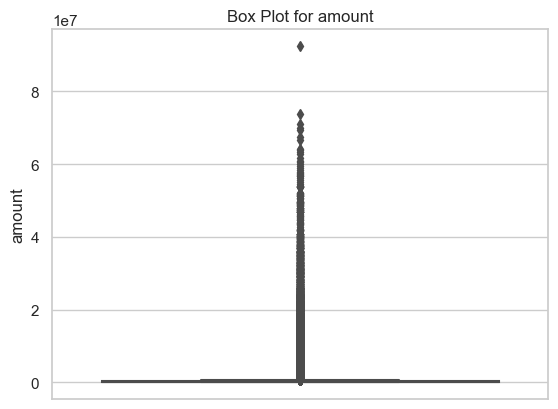

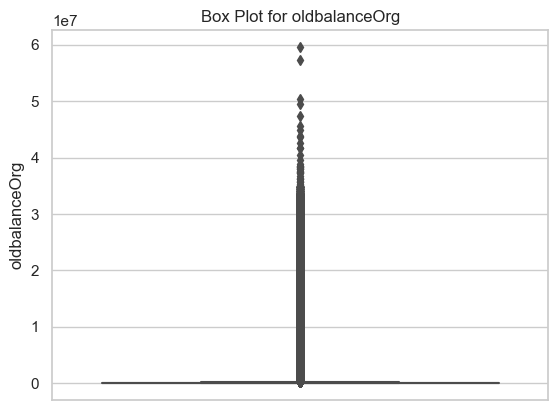

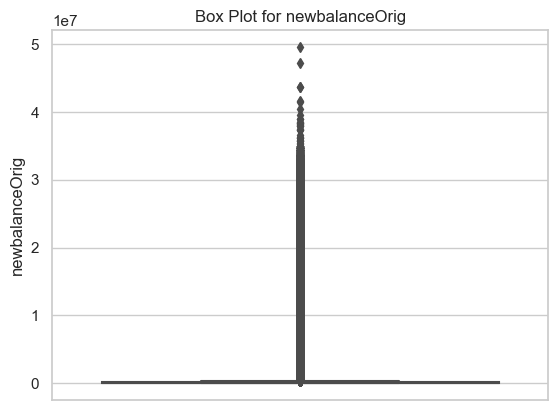

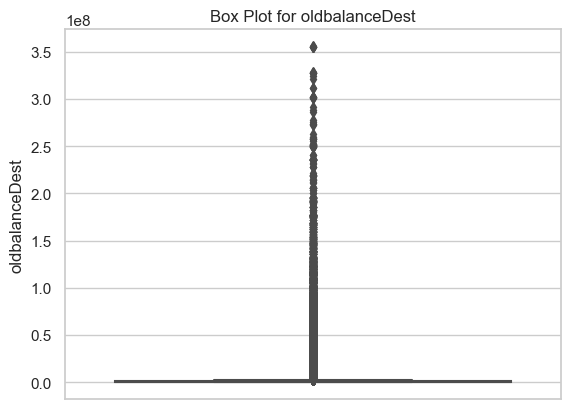

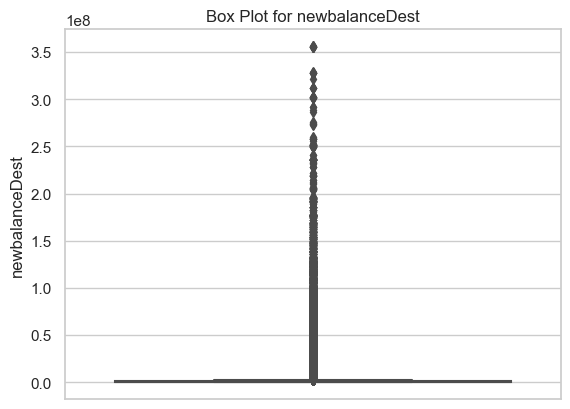

In [ ]:
for column in num_cols:
    plt.figure()
    sns.boxplot(y=data[column], orient='v')
    plt.title(f'Box Plot for {column}')
plt.show()

- When examining the boxplots without log transformation, we observe that there are many outliers.
- The presence of many outliers in the boxplot could be due to the nature of financial transaction data, where large amounts or unusual transactions may be present.
- In order to avoid this we shall take log transforms of the numerical columns and then visualize the outliers.

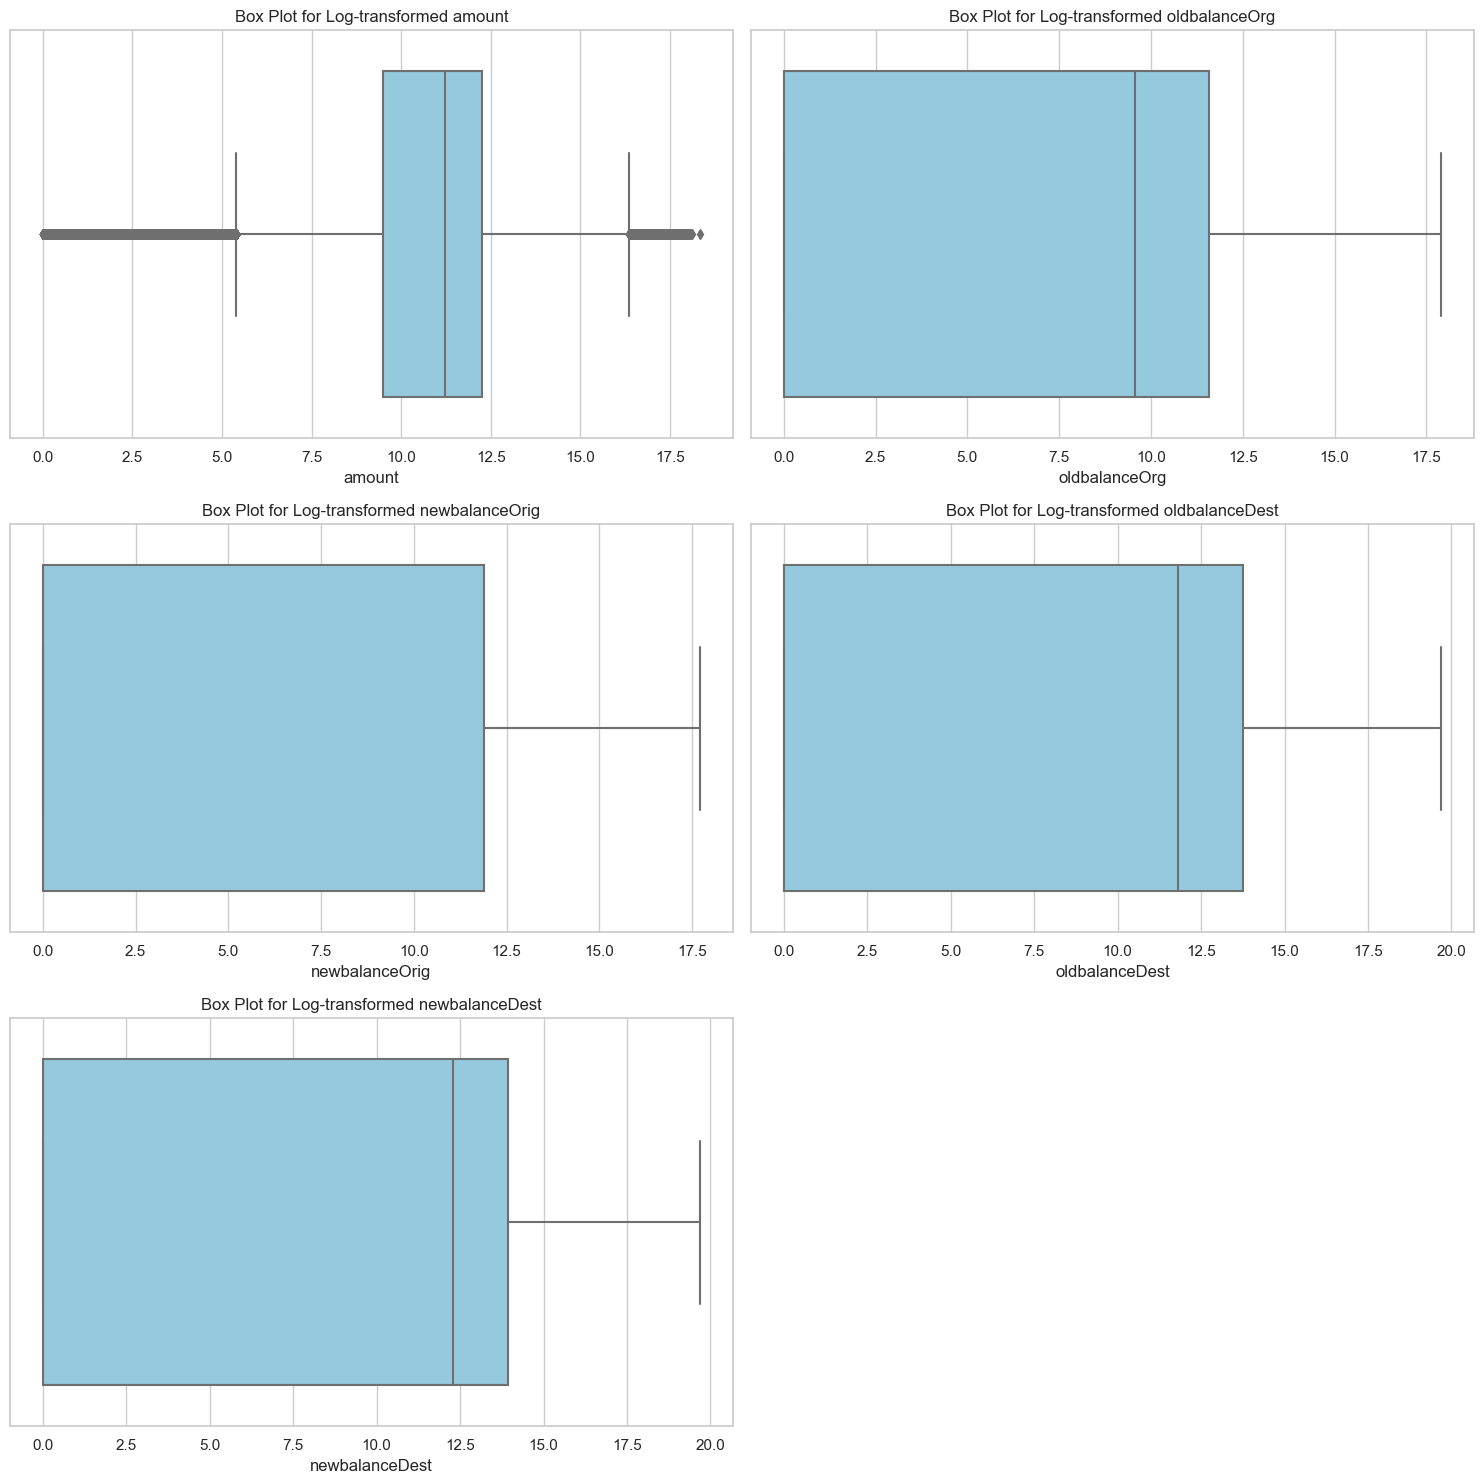

In [ ]:
# Visualising boxplots after log transformation
plt.figure(figsize=(15, 15))
for i, column in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    # Log-transform the column values (adding 1 to handle zeros)
    log_transformed_values = np.log1p(data[column])
    sns.boxplot(x=log_transformed_values, color='skyblue')
    plt.title(f'Box Plot for Log-transformed {column}')
plt.tight_layout()
plt.show()

- We observe out of range values in the `amount` column.
- In financial transaction data, large or unusual transactions might be legitimate and important for analysis.
- Removing them without proper understanding could lead to a loss of valuable information.

In [ ]:
# Summary statistics for 'amount'
summary_stats = data['amount'].describe()
print(summary_stats)

count    6.362620e+06
mean     1.798619e+05
std      6.038582e+05
min      0.000000e+00
25%      1.338957e+04
50%      7.487194e+04
75%      2.087215e+05
max      9.244552e+07
Name: amount, dtype: float64


## **2.4 Checking for multi-collinearity**

<Axes: >

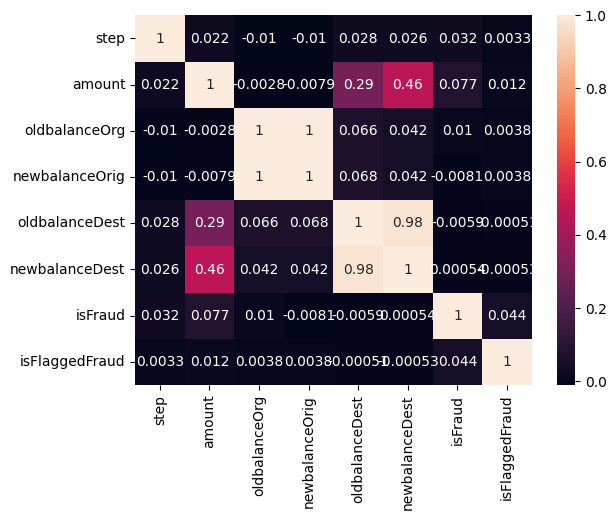

In [ ]:
# Detecting mult-collinearity using correlation matrix
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
numeric_data = data[numeric_columns]
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix,annot=True)

- There is a low positive correlation (0.29) between `amount` and `oldbalanceDest`

- There is a moderation positive correlation (0.46) between `amount` and `newbalanceDest`

- There is a strong positive correlation (0.98) between `oldbalanceDest` and `newbalanceDest`

For better understanding of multicollinearity let us use VIF(Variance Inflation Factor).
- VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated.
- A high VIF (usually greater than 10) indicates multicollinearity.

In [ ]:
# Detecting multi-collinearity using VIF
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_data.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]
print(vif_data)

         Variable         VIF
0            step    1.191094
1          amount    4.078952
2   oldbalanceOrg  544.053103
3  newbalanceOrig  546.346008
4  oldbalanceDest   72.895522
5  newbalanceDest   84.584619
6         isFraud    1.188386
7  isFlaggedFraud    1.002546


- Variables with high VIF values (e.g., 'oldbalanceOrg', 'newbalanceOrig') may have high multicollinearity with other variables in the dataset, which could impact the stability and interpretability of regression models.

### **2.5 Addressing multi-collinearity and parameter selection**

- The primary parameter in this code is the VIF threshold, set to 10. This threshold determines when a variable is considered to have high multicollinearity and should be removed.
- The choice of 10 is a common rule of thumb, but it can be adjusted based on the specific requirements and characteristics of the dataset.
- This iterative process helps in identifying and removing multicollinear variables until the dataset no longer contains variables with VIF values exceeding the chosen threshold, contributing to a more stable model.

**Iterative approach to check and remove variables with high VIF values:**

In [ ]:
while True:
    # Calculate VIF
    vif_data = pd.DataFrame()
    vif_data["Variable"] = numeric_data.columns
    vif_data["VIF"] = [variance_inflation_factor(numeric_data.values, i) for i in range(numeric_data.shape[1])]

    # Identify the variable with the highest VIF
    max_vif_variable = vif_data.loc[vif_data['VIF'].idxmax()]['Variable']
    max_vif_value = vif_data.loc[vif_data['VIF'].idxmax()]['VIF']

    # Check if the highest VIF exceeds a threshold(10)
    if max_vif_value > 10:
        print(f"Removing {max_vif_variable} (VIF: {max_vif_value})")
        numeric_data = numeric_data.drop(max_vif_variable, axis=1)
    else:
        break

# Print the final DataFrame after removing columns
print("Final DataFrame after removing high VIF columns:")
print(numeric_data)


Removing newbalanceOrig (VIF: 546.3460079624596)
Removing newbalanceDest (VIF: 82.3227929894473)
Final DataFrame after removing high VIF columns:
         step      amount  oldbalanceOrg  oldbalanceDest  isFraud  \
0           1     9839.64      170136.00            0.00        0   
1           1     1864.28       21249.00            0.00        0   
2           1      181.00         181.00            0.00        1   
3           1      181.00         181.00        21182.00        1   
4           1    11668.14       41554.00            0.00        0   
...       ...         ...            ...             ...      ...   
6362615   743   339682.13      339682.13            0.00        1   
6362616   743  6311409.28     6311409.28            0.00        1   
6362617   743  6311409.28     6311409.28        68488.84        1   
6362618   743   850002.52      850002.52            0.00        1   
6362619   743   850002.52      850002.52      6510099.11        1   

         isFlaggedFraud  

## **Key Factors determined using VIF**
- Transaction Timestamp (step)
- Transaction Amount (amount)
- Old Balance of Originating Account (oldbalanceOrg)
- Old Balance of Destination Account (oldbalanceDest)
- Flagged Fraud Indicator (isFlaggedFraud)

The identified factors make sense for fraud detection in financial transactions. Let's discuss each factor and how it contributes to the understanding of potentially fraudulent activities:

- Transaction Timestamp (step): The time at which a transaction occurs can be crucial for fraud detection. Fraudulent activities may exhibit patterns or anomalies at specific times of the day, week, or month. Analyzing temporal trends can help identify unusual transaction patterns.

- Transaction Amount (amount): Unusually large or small transaction amounts can be indicative of fraudulent behavior. Fraudsters may attempt to conduct transactions that deviate significantly from the typical transaction size to avoid detection.

- Old Balance of Originating Account (oldbalanceOrg):The old balance of the originating account provides context on the account's financial history. Sudden and significant changes in the account balance before a transaction may signal potential fraudulent activities, such as unauthorized access or account manipulation.

- Old Balance of Destination Account (oldbalanceDest): Similar to the originating account, the old balance of the destination account offers insights into the financial state of the account before a transaction. Unusual changes in the destination account's balance may indicate fraudulent activities, such as money laundering or account manipulation.

- Flagged Fraud Indicator (isFlaggedFraud): The binary indicator of whether a transaction is flagged as potentially fraudulent provides additional information. Flagging criteria could be based on predefined rules or anomaly detection algorithms, contributing to the identification of high-risk transactions.

# **3. Exploratory Data Analysis**

## **Quick overview of the data using automated profiling**

In [ ]:
!pip install ydata-profiling

In [ ]:
from ydata_profiling import ProfileReport

In [ ]:
report=ProfileReport(data)

In [ ]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

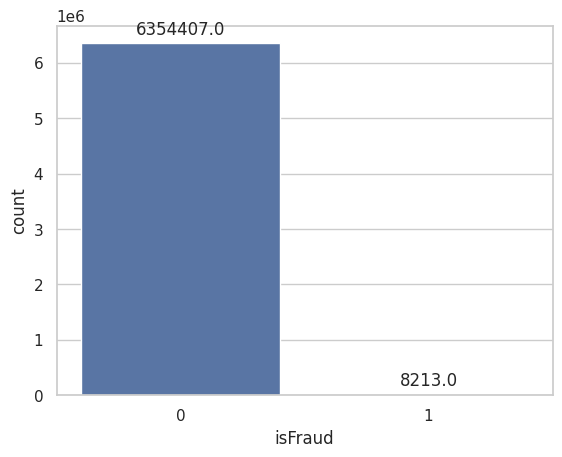

In [ ]:
sns.set(style="whitegrid")
ax = sns.countplot(x='isFraud', data=data)

# Adding count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


# **4. Fraud Detection Model - Random Forest Classifier**

## **Description of the model used:**
A Random Forest model was chosen for fraud detection due to its ability to handle complex relationships, nonlinearities, and imbalanced datasets. The model was trained on a dataset that underwent preprocessing, including feature scaling and handling class imbalance through the use of the class_weight='balanced' parameter.

- The target variable in the given dataset is `isFraud`. This is a binary classification problem.
- When Logistic Regression model for this task the accuracy achieved was 97%. However, the confusion matrix had 69 false positive and 939 false negative values. Also, the precision class 1 was very low (0.1). Various techniques like SMOTE, K-fold cross validation were implemented to improve this but the score did not improve.
- Random forest model was used for the same and the precision and recall scores improved significantly.
- To enhance the performance of the model, we shall use the features obtained by removing columns having high VIF.

In [ ]:
# Copy the DataFrame to avoid modifying the original data
df = data.copy()

# Label Encoding for 'type' column
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Choosing the variables obtained as a result of dropping variables with high VIF
df= df.drop(['nameOrig', 'nameDest','newbalanceOrig','newbalanceDest'], axis=1)

In [ ]:
X=df.drop(columns=['isFraud'])
y=df['isFraud']

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## **Logistic Regression**

In [ ]:
# Model Building and Evaluation

# Logistic Regression
logistic_model = LogisticRegression(class_weight='balanced',random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

print(' Results:')
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

 Results:
Accuracy: 0.9700
Confusion Matrix:
[[1232903   38001]
 [    165    1455]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98   1270904
           1       0.04      0.90      0.07      1620

    accuracy                           0.97   1272524
   macro avg       0.52      0.93      0.53   1272524
weighted avg       1.00      0.97      0.98   1272524



In [ ]:
# Logistic Regression using balanced parameter
logistic_model = LogisticRegression(class_weight='balanced',random_state=42)
logistic_model.fit(X_train_scaled, y_train)
y_pred_logistic = logistic_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
class_report = classification_report(y_test, y_pred_logistic)

print(' Results:')
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

 Results:
Accuracy: 0.8879
Confusion Matrix:
[[1128672  142232]
 [    466    1154]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94   1270904
           1       0.01      0.71      0.02      1620

    accuracy                           0.89   1272524
   macro avg       0.50      0.80      0.48   1272524
weighted avg       1.00      0.89      0.94   1272524



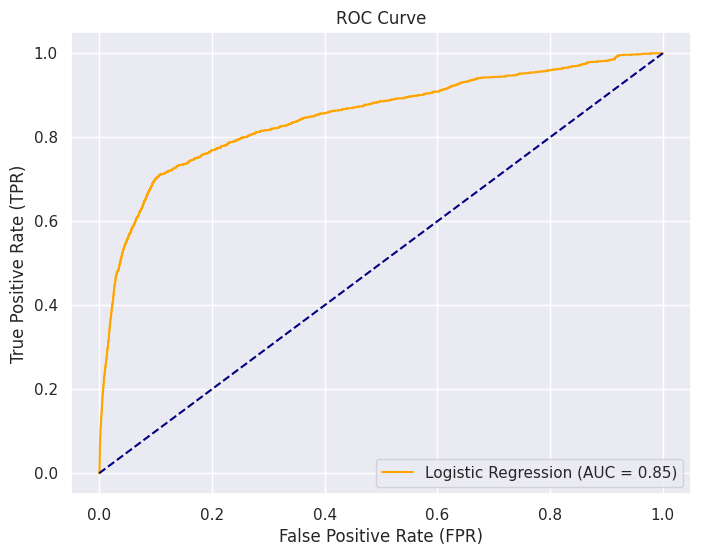

In [ ]:
# Get predicted probabilities for the positive class
y_prob_logistic = logistic_model.predict_proba(X_test_scaled)[:, 1]
# Compute ROC curve values
fpr, tpr, _ = roc_curve(y_test, y_prob_logistic)
# Compute area under the curve (AUC)
auc_logistic = auc(fpr, tpr)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_logistic:.2f})', color='orange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## **Random Forest Classifier**

In [ ]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest Model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(' Results for Random Forest:')
print(f'Accuracy: {accuracy_rf:.4f}')
print('Confusion Matrix:')
print(conf_matrix_rf)
print('Classification Report:')
print(class_report_rf)


 Results for Random Forest:
Accuracy: 0.9996
Confusion Matrix:
[[1270832      72]
 [    475    1145]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.94      0.71      0.81      1620

    accuracy                           1.00   1272524
   macro avg       0.97      0.85      0.90   1272524
weighted avg       1.00      1.00      1.00   1272524



### **Interpretations**
- While the overall accuracy is high, the model's performance on the minority class (fraudulent transactions) is less balanced.
- The precision of 94% indicates that when the model predicts fraud, it is accurate 94% of the time. However, the recall of 71% suggests that the model misses a substantial portion of actual fraudulent transactions.
- The F1-score of 81% provides a balanced assessment, considering both precision and recall.
- The support values highlight the class imbalance, with significantly more non-fraudulent instances than fraudulent ones.

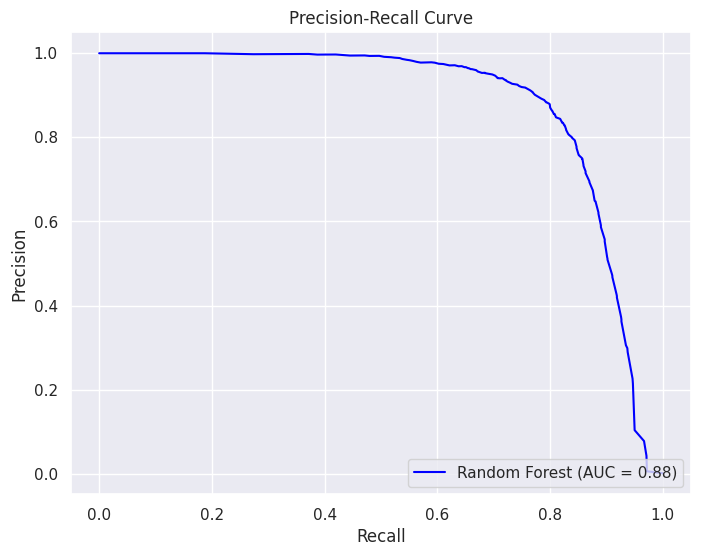

In [ ]:
# Get predicted probabilities for the positive class
y_prob_rf = rf_model.predict_proba(X_test_scaled)[:, 1]
# Compute precision-recall curve values
precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_prob_rf)
# Compute area under the curve (AUC)
auc_rf = auc(recall_rf, precision_rf)
# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_rf, precision_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# **Prevention Measures during Infrastructure Update**
- When updating infrastructure, adopt preventive measures such as encryption, multi-factor authentication, access controls, and regular security audits.
-  Ensure employees are trained on security best practices, and establish an incident response plan.

# **Determining Effectiveness**
- To determine effectiveness, monitor security metrics, conduct incident response drills, perform penetration testing, use user behavior analytics, and regularly assess and audit security measures.
-  Solicit feedback from the security team, assess compliance with industry standards, and consider customer satisfaction regarding transaction security. Continuous improvement is crucial to adapt to evolving threats.